### set data

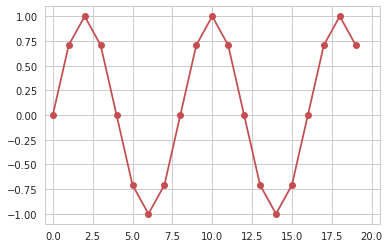

In [1]:
%matplotlib inline
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [2]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

data를 3개씩 잘라서 그 다음 것을 예측하도록 트레이닝

ex) 1-3월 매출 -> 4월 매출 예측

In [3]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [6]:
X_train[0:2]

array([[[0.        ],
        [0.70710678],
        [1.        ]],

       [[0.70710678],
        [1.        ],
        [0.70710678]]])

In [7]:
Y_train[0:2]

array([7.07106781e-01, 1.22464680e-16])

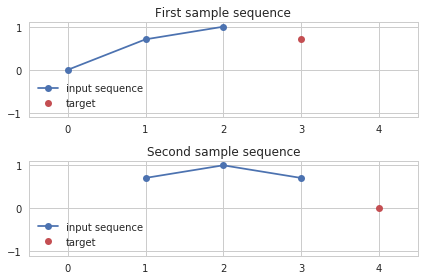

In [8]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

## modeling

In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear")) # 0-1 사이의 값이 나오는 문제가 아님
model.compile(loss='mse', optimizer='sgd')

/home/mk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


학습전

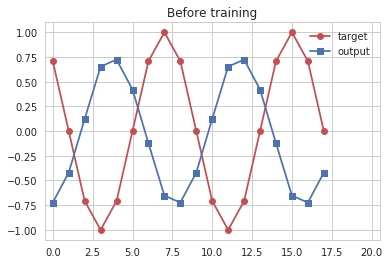

In [10]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

학습

In [11]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

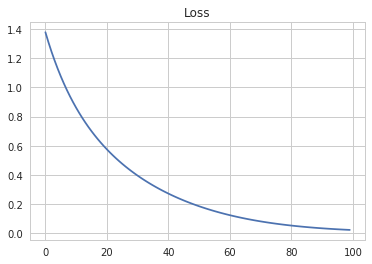

In [12]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

학습 후 예측

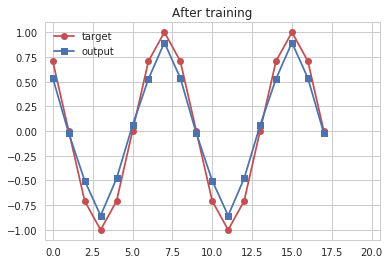

In [13]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

seq-to-seq

`return_seqences = True` : many-to-many

In [14]:
from keras.layers import TimeDistributed

model2 = Sequential()
model2.add(SimpleRNN(10, return_sequences=True, input_shape=(3, 1)))
model2.add(TimeDistributed(Dense(1, activation="linear"))) # 3차원 텐서 입력
model2.compile(loss='mse', optimizer='sgd')

출력값을 3개짜리 순서열로

In [18]:
#기존 train
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [19]:
X_train2 = S[:-3, 0:3][:, :, np.newaxis]
Y_train2 = S[:-3, 3:6][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((16, 3, 1), (16, 3, 1))

In [23]:
print(X_train[:2])
X_train2[:2]

[[[0.        ]
  [0.70710678]
  [1.        ]]

 [[0.70710678]
  [1.        ]
  [0.70710678]]]


array([[[0.        ],
        [0.70710678],
        [1.        ]],

       [[0.70710678],
        [1.        ],
        [0.70710678]]])

In [24]:
print(Y_train[:2])
Y_train2[:2]

[7.07106781e-01 1.22464680e-16]


array([[[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]],

       [[ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00]]])

### train data 모습

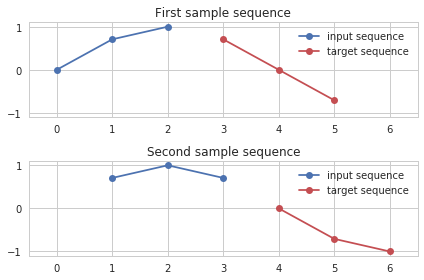

In [25]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train2[0].flatten(), 'bo-', label="input sequence")
plt.plot([3, 4, 5], Y_train2[0].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

### fitting

In [26]:
history2 = model2.fit(X_train2, Y_train2, epochs=100, verbose=0)

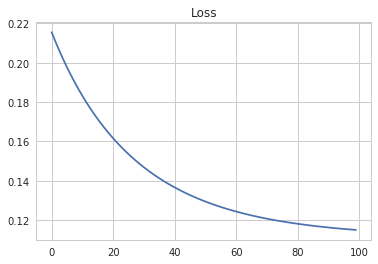

In [27]:
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.show()

### 학습 후

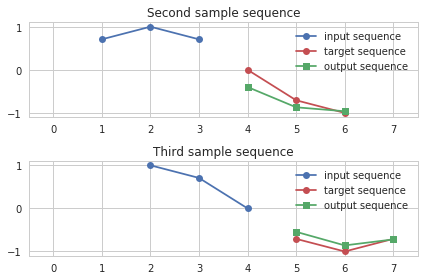

In [28]:
plt.subplot(211)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.plot([4, 5, 6], model2.predict(X_train2[1:2,:,:]).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.subplot(212)
plt.plot([2, 3, 4], X_train2[2].flatten(), 'bo-', label="input sequence")
plt.plot([5, 6, 7], Y_train2[2].flatten(), 'ro-', label="target sequence")
plt.plot([5, 6, 7], model2.predict(X_train2[2:3,:,:]).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Third sample sequence")
plt.tight_layout()
plt.show()